#Project : Mortgage Prepayment Analysis and Prediction

####Aim of the project : To predict the mortgage backed securities prepayment risks using machine learning models.

#### 1st step: Import the libraries and load the dataset.



In [1]:
# Import the libraries
import pandas as pd
import numpy as np


In [3]:
#Load the dataset
df = pd.read_csv('/content/LoanExport.csv')

<ipython-input-3-8382b89f516a>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/LoanExport.csv')


##Explore The dataset

In [4]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [6]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


###2nd step: Now identify the missing values

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


In [8]:
# Drop the 'SellerName' column because 'SellerName' has the most number of missing values (24994)
df.drop(columns=['SellerName'], inplace=True)


In [9]:
# Filling missing numerical values with mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

####3rd step : Convert Date Columns to Datetime Format.

In [10]:
# Convert 'FirstPaymentDate' and 'MaturityDate' to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')


#### 4th step : Feature Engineering on Date Columns : here extract useful information from date columns.

In [11]:
# Now extract year and month from 'FirstPaymentDate' and 'MaturityDate'
df['FirstPaymentYear'] = df['FirstPaymentDate'].dt.year
df['FirstPaymentMonth'] = df['FirstPaymentDate'].dt.month
df['MaturityYear'] = df['MaturityDate'].dt.year
df['MaturityMonth'] = df['MaturityDate'].dt.month

In [12]:
# Calculate the loan term in months
df['LoanTermMonths'] = (df['MaturityYear'] - df['FirstPaymentYear']) * 12 + (df['MaturityMonth'] - df['FirstPaymentMonth'])


In [13]:
#Drop original date columns as they have been transformed into numerical features
df.drop(columns=['FirstPaymentDate', 'MaturityDate'], inplace=True)

####5th step: Identify categorical variables and encode them into numerical values.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [15]:
#Rename columns for better understanding
df.rename(columns={
    'MSA': 'MetropolitanStatArea',
    'MIP': 'MortgageInsurancePremium',
    'OCLTV': 'OriginalCombinedLoanToValue',
    'DTI': 'DebtToIncomeRatio',
    'LTV': 'LoanToValueRatio',
    'OrigUPB': 'OriginalUnpaidPrincipalBalance',
    'PPM': 'PrepaymentPenaltyMortgage',
    'OrigInterestRate': 'OriginalInterestRate',
    'OrigLoanTerm': 'OriginalLoanTerm'
}, inplace=True)


In [16]:
# Now display the first some rows of the cleaned dataset
df.head()

,CreditScore,FirstTimeHomebuyer,MetropolitanStatArea,MortgageInsurancePremium,Units,Occupancy,OriginalCombinedLoanToValue,DebtToIncomeRatio,OriginalUnpaidPrincipalBalance,LoanToValueRatio,...,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth,LoanTermMonths
0,0,N,16974,25,1,O,89,27,117000,89,...,2,WASHINGTONMUTUALBANK,0,0,52,1999,2,2029,1,359
1,0,N,19740,0,1,O,73,17,109000,73,...,1,CHASEHOMEFINANCELLC,0,0,144,1999,2,2029,1,359
2,0,N,29940,0,1,O,75,16,88000,75,...,2,WASHINGTONMUTUALBANK,0,0,67,1999,2,2029,1,359
3,0,N,31084,0,1,O,76,14,160000,76,...,2,GMACMTGECORP,0,0,35,1999,2,2029,1,359
4,0,N,35644,0,1,O,78,18,109000,78,...,2,GMACMTGECORP,0,0,54,1999,2,2029,1,359


In [17]:
# Identify rows with 'X'
rows_to_drop = df[(df == 'X').any(axis=1) | (df == 'X    ').any(axis=1) | (df == 'X ').any(axis=1)].index

# Drop these rows
df_cleaned = df.drop(index=rows_to_drop)

# Check the shape of the cleaned dataframe
df_cleaned.shape


(181663, 30)

In [18]:
# Dropping all rows with missing values
df_cleaned_final = df_cleaned.dropna()

# Check the shape of the final cleaned dataset
df_cleaned_final.shape

(181663, 30)

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame initialization (Assuming df_cleaned_final is already defined)

# Step 1: Identify categorical columns
categorical_cols = df_cleaned_final.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns identified:", categorical_cols)

# Step 2: Convert all categorical columns to string type
df_cleaned_final[categorical_cols] = df_cleaned_final[categorical_cols].astype(str)

# Step 3: Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_cleaned_final[col] = label_encoder.fit_transform(df_cleaned_final[col])

# Step 4: Verify that all data is numeric
print(df_cleaned_final.dtypes.unique())

# Then further code (splitting data, model training, etc.)


Categorical columns identified: ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'ServicerName']
[dtype('int64') dtype('float64') dtype('int32')]


####6th step : Prepare Data for Classification

6th(a) : Define Features and Target Variable & Split the Data into Training and Testing Sets

6th(b) : Train the Classification Model : Use Logistic Regression as our initial classification model

In [26]:

from sklearn.model_selection import train_test_split

# Define the target variable
y = df_cleaned_final['EverDelinquent']

# Define the feature set by dropping the target variable
X = df_cleaned_final.drop(columns=['EverDelinquent'])

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train) # Now the model should train without errors

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

####7th step: Evaluate the Model & Generate Predictions

In [27]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


####8th step: Now calculate evaluation metrics

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f = f1_score(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f)
print("\nClassification Report:\n", report)

Accuracy: 0.876310791842127
Precision: 0.8255194459243473
Recall: 0.4466705102334967
F1-score: 0.579685746352413

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     29395
           1       0.83      0.45      0.58      6938

    accuracy                           0.88     36333
   macro avg       0.85      0.71      0.75     36333
weighted avg       0.87      0.88      0.86     36333



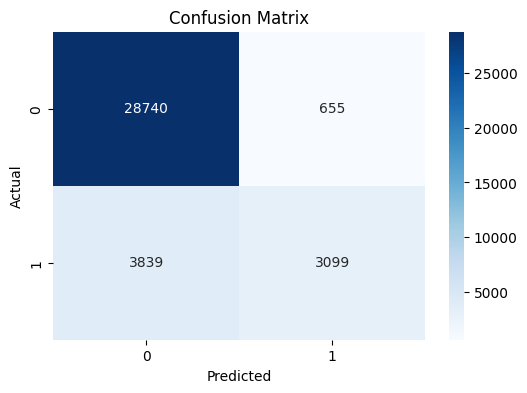

In [29]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt # Plot the matrix graph

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Generating Report
####Classification Report :

[0] -- Not Deliquent -

precision = 0.88

recall = 0.98

f1-score = 0.93

[1] -- Deliquent -

precision = 0.83

recall = 0.45

f1-score = 0.58

##Interpretation:

High Accuracy (87.63%): The model generally performs well, correctly predicting outcomes in most cases.

Precision (82.55%): Out of all the loans that the model predicted would be delinquent, 82% actually turned out to be delinquent. This shows that the model is effective at reducing the number of incorrect predictions where it falsely identifies a loan as delinquent when it isn't.

Recall (44.66%): The model was able to correctly identify 44% of all actual delinquent loans. This means it's fairly good at detecting most of the delinquent loans, but it does miss some, which results in a few being incorrectly classified as non-delinquent.